In [1]:
#data processing libraries
import numpy as np
import pandas as pd

#data visualizations libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style='whitegrid', palette='viridis')
%matplotlib inline

import time

import os

# List Available files
import os
for dirname, _, filenames in os.walk('src/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
#First we need read the data from files that we want analyse
bitcoin_news_df = pd.read_csv('../src/fase1_Bitcoin.csv')
bitcoin_prices_df = pd.read_csv('../src/fase1_Bitcoin_prices.csv')
crypto_news_df = pd.read_csv('../src/fase1_cryptonews.csv')

print(bitcoin_prices_df.head(10))
print(bitcoin_news_df.head(10))
print(crypto_news_df.head(10))

         Date     Price      Open      High       Low     Vol. Change %
0  12/19/2023  42,259.3  42,659.7  43,473.3  41,842.7   55.29K   -0.94%
1  12/18/2023  42,659.7  41,369.1  42,728.0  40,554.0   61.58K    3.12%
2  12/17/2023  41,368.7  42,271.7  42,413.2  41,276.9   35.46K   -2.14%
3  12/16/2023  42,271.7  41,929.0  42,690.3  41,698.2   30.11K    0.82%
4  12/15/2023  41,929.0  43,025.2  43,080.7  41,697.9   45.28K   -2.55%
5  12/14/2023  43,025.9  42,886.3  43,392.7  41,591.2   59.15K    0.33%
6  12/13/2023  42,884.5  41,487.0  43,417.5  40,649.3   63.11K    3.37%
7  12/12/2023  41,487.0  41,256.1  42,070.9  40,691.5   57.04K    0.56%
8  12/11/2023  41,256.1  43,791.0  43,806.3  40,277.1  105.19K   -5.79%
9  12/10/2023  43,791.0  43,716.6  44,045.4  43,576.8   23.81K    0.17%
                                               title  score      id  \
0  Can someone help explain to me how and why a l...      1  zpi5h0   
1                                   Bitcoin is King…      2  zphp0

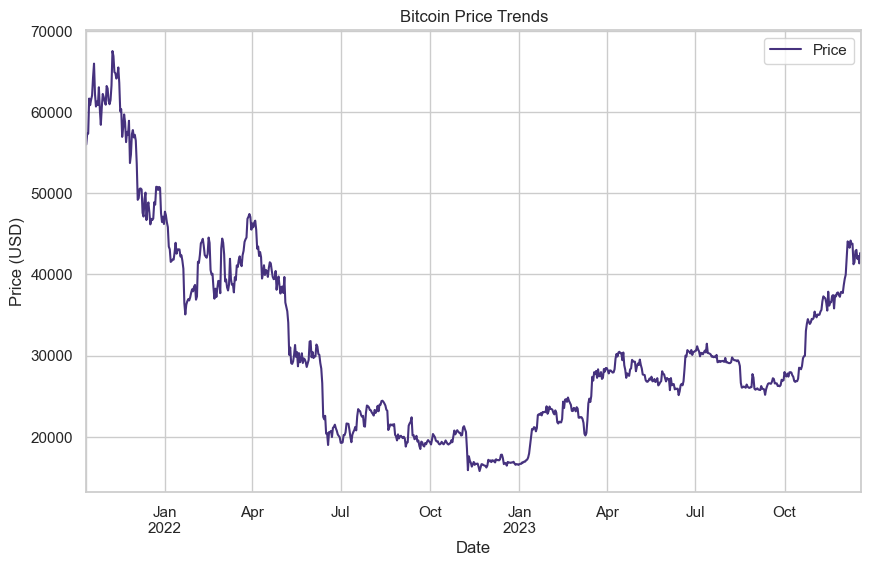

In [3]:
# Data Preprocessing
# Convert 'Price' column to numeric format
bitcoin_prices_df['Price'] = bitcoin_prices_df['Price'].replace('[\$,]', '', regex=True).astype(float)

# Data Analysis
# Plot Bitcoin price trends over time
bitcoin_prices_df['Date'] = pd.to_datetime(bitcoin_prices_df['Date'])
bitcoin_prices_df.plot(x='Date', y='Price', kind='line', title='Bitcoin Price Trends', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [4]:
#format date time columns from each data frame
crypto_news_df['date'] = pd.to_datetime(crypto_news_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
crypto_news_df.dropna(subset=['date'], inplace=True)
crypto_news_df['date'] = crypto_news_df['date'].dt.strftime('%Y-%m-%d')

bitcoin_prices_df.rename(columns={'Date': 'date', 'Change %': 'change'}, inplace=True)
bitcoin_prices_df['date'] = pd.to_datetime(bitcoin_prices_df['date']).dt.strftime('%Y-%m-%d')

# Convert 'timestamp' column to datetime format
bitcoin_news_df['timestamp'] = pd.to_datetime(bitcoin_news_df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop rows with missing or invalid timestamps
bitcoin_news_df.dropna(subset=['timestamp'], inplace=True)

# Format 'timestamp' column to contain only date
bitcoin_news_df['date'] = bitcoin_news_df['timestamp'].dt.strftime('%Y-%m-%d')

# Drop the original 'timestamp' column
bitcoin_news_df.drop(columns=['timestamp'], inplace=True)


In [5]:
crypto_news_df.info()
bitcoin_prices_df.info()
bitcoin_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31035 entries, 0 to 31036
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       31035 non-null  object
 1   sentiment  31035 non-null  object
 2   source     31035 non-null  object
 3   subject    31035 non-null  object
 4   text       31035 non-null  object
 5   title      31035 non-null  object
 6   url        31035 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    799 non-null    object 
 1   Price   799 non-null    float64
 2   Open    799 non-null    object 
 3   High    799 non-null    object 
 4   Low     799 non-null    object 
 5   Vol.    799 non-null    object 
 6   change  799 non-null    object 
dtypes: float64(1), object(6)
memory usage: 43.8+ KB
<class 'pandas.c

In [6]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = df.isna().sum() / len(df)
    summary_df['count'] = df.count().values 
    summary_df['unique'] = df.nunique().values
    return summary_df

summary(bitcoin_news_df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
title,object,0,0.000000,1897,992
score,int64,0,0.000000,1897,201
id,object,0,0.000000,1897,1897
url,object,902,0.475488,995,995
comms_num,int64,0,0.000000,1897,167
created,float64,0,0.000000,1897,1879
body,object,427,0.225092,1470,1464
date,object,0,0.000000,1897,12


In [7]:
bitcoin_news_df.describe().T
bitcoin_news_df.head()

,title,score,id,url,comms_num,created,body,date
0,Can someone help explain to me how and why a l...,1,zpi5h0,https://www.reddit.com/r/Bitcoin/comments/zpi5...,0,1.671425e+09,[https://mempool.space/block/00000000000000000...,2022-12-19
1,Bitcoin is King…,2,zphp0p,https://www.reddit.com/r/Bitcoin/comments/zphp...,4,1.671424e+09,Once you understand #bitcoin and truly underst...,2022-12-19
2,The FTX disaster has set back crypto by ‘years...,0,zphb0d,https://www.reddit.com/r/Bitcoin/comments/zphb...,9,1.671422e+09,As reported by [CNBC](https://www.cnbc.com/202...,2022-12-19
3,Will the loss of more Bitcoins over time resul...,5,zph6iu,https://www.reddit.com/r/Bitcoin/comments/zph6...,6,1.671422e+09,As more people accept Bitcoin and more Bitcoin...,2022-12-19
4,Experts Say Sam Bankman-Fried's Best Legal Def...,21,zph0z1,https://futurism.com/the-byte/sbf-ftx-legal-de...,8,1.671422e+09,NaN,2022-12-19


In [8]:
# Descriptive statistics
statistics = bitcoin_news_df['score'].describe()
print(statistics)

count    1897.000000
mean       43.835530
std       227.552825
min        -9.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      4304.000000
Name: score, dtype: float64


In [13]:
#DTL - transforming scores in sentiment 
# Group by date and sum the scores
daily_scores = bitcoin_news_df.groupby('date')['score'].sum()

# Normalize the daily scores
normalized_scores = (daily_scores - daily_scores.mean()) / daily_scores.std()

# Define thresholds based on percentiles of normalized scores
negative_threshold = normalized_scores.quantile(0.25)
positive_threshold = normalized_scores.quantile(0.75)

# Function to determine sentiment based on normalized scores
def determine_sentiment(score):
    if score >= positive_threshold:
        return 'positive'
    elif score <= negative_threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment determination to the DataFrame
bitcoin_news_df['sentiment'] = bitcoin_news_df['date'].map(normalized_scores).apply(determine_sentiment)

print(bitcoin_news_df.head(15))
print(bitcoin_prices_df.head(15))

                                                title  score      id  \
0   Can someone help explain to me how and why a l...      1  zpi5h0   
1                                    Bitcoin is King…      2  zphp0p   
2   The FTX disaster has set back crypto by ‘years...      0  zphb0d   
3   Will the loss of more Bitcoins over time resul...      5  zph6iu   
4   Experts Say Sam Bankman-Fried's Best Legal Def...     21  zph0z1   
5               Hal Finney's Vision for Bitcoin Banks      2  zpgiog   
6   Whats the most elitist take on bitcoin you can...      0  zpgdj4   
7                  Current 30-day correlation charts?      1  zpgasm   
8   #Shorts Taylor's advice she'd give to her youn...      1  zpfmev   
9                    God gave me 2 for a reason. #BTC     70  zpfldx   
10        BTC withdrawal to Taproot address resolved?      1  zpebss   
11  Does it matter if I send BTC from Coinbase to ...      3  zpczmq   
12                         Taproot vs SegWit Adoption      1  zp

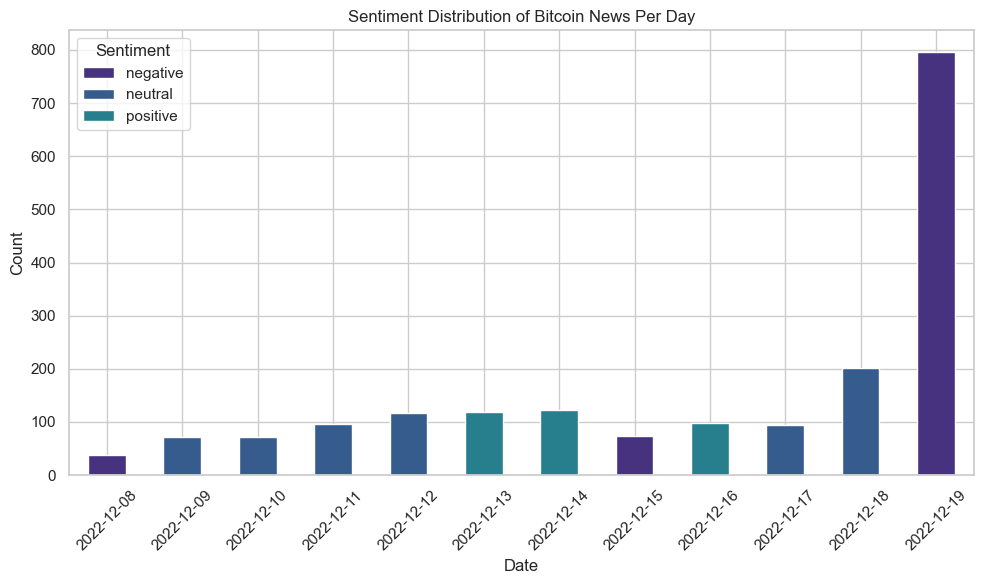

In [15]:
# Group by date and sentiment, and then count occurrences
sentiment_distribution = bitcoin_news_df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments per day
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution of Bitcoin News Per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
summary(crypto_news_df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
date,object,0,0.000000,31035,774
sentiment,object,0,0.000000,31035,3931
source,object,0,0.000000,31035,3
subject,object,0,0.000000,31035,6
text,object,0,0.000000,31035,30421
title,object,0,0.000000,31035,30962
url,object,0,0.000000,31035,31035


In [17]:
crypto_news_df.describe().T

,count,unique,top,freq
date,31035,774,2023-11-02,79
sentiment,31035,3931,"{'class': 'neutral', 'polarity': 0.0, 'subject...",6915
source,31035,3,CoinTelegraph,13008
subject,31035,6,bitcoin,9968
text,31035,30421,"Get your daily, bite-sized digest of cryptoass...",447
title,31035,30962,Is it Too Late to Buy Shiba Inu? Crypto Expert...,4
url,31035,31035,https://cryptonews.comhttps://cryptonews.com/n...,1


In [18]:
crypto_news_df.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [19]:
#transform sentiment from object
crypto_news_df.loc[0, 'sentiment']


"{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}"

In [20]:
# Example visualization
# Plotting a histogram of sentiments
#crypto_news_df = dfs["../src/fase1_cryptonews.csv"]

def get_sentiment_verdict(data):
    data = eval(data)
    return data['class']

crypto_news_df['sentiment'] = crypto_news_df['sentiment'].apply(get_sentiment_verdict)

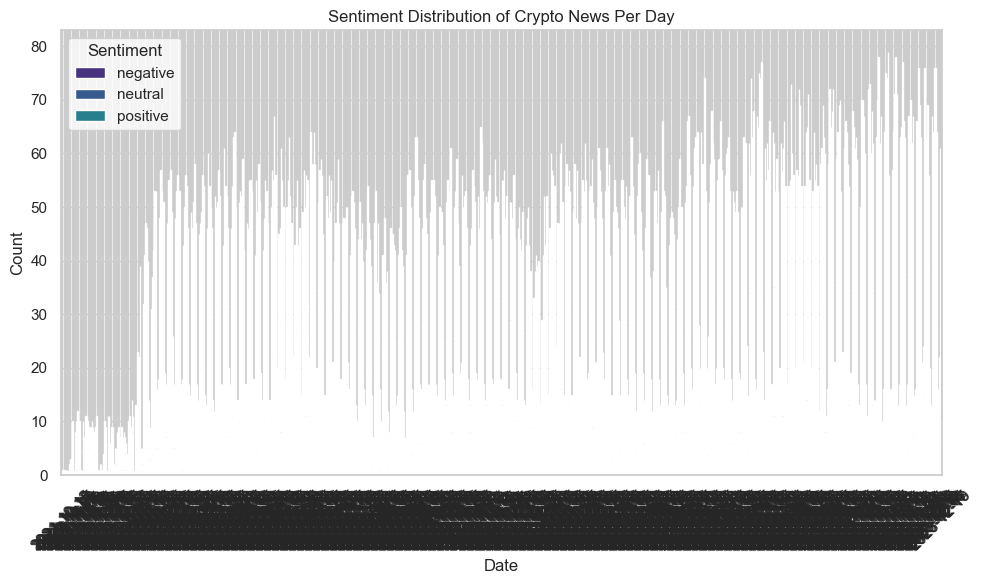

In [23]:
# Group by date and sentiment, and then count occurrences
sentiment_distribution_crypto_news = crypto_news_df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments per day
sentiment_distribution_crypto_news.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution of Crypto News Per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


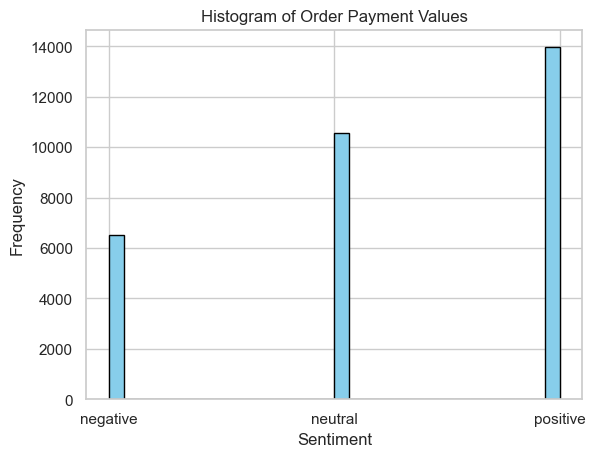

In [22]:
## histogram

plt.hist(crypto_news_df["sentiment"], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Order Payment Values')
plt.show()

In [ ]:
##possible sentiment values
print('Possible values:')
print(f'Sentiment: {crypto_news_df.sentiment.unique()}')
print(f'Source: {crypto_news_df.source.unique()}')
print(f'Subject: {crypto_news_df.subject.unique()}')


#cleaning data 
#crypto_news_df['negative'] = (crypto_news_df['sentiment'] == 'negative').astype(int)
#crypto_news_df['neutral'] = (crypto_news_df['sentiment'] == 'neutral').astype(int)
#crypto_news_df['positive'] = (crypto_news_df['sentiment'] == 'positive').astype(int)

#crypto_news_df.drop(columns = ['sentiment', 'source', 'subject'], inplace=True)
crypto_news_df = crypto_news_df.groupby('date').sum().reset_index().sort_values(by='date')


crypto_news_df.sample(5)

In [ ]:
##Threating bitcoin prices
############################################################
summary(bitcoin_prices_df).style.background_gradient(cmap='Purples')

In [ ]:
bitcoin_prices_df.describe().T

In [ ]:
summary(bitcoin_prices_df).style.background_gradient(cmap='Oranges')

In [ ]:
def clean_change(change):
    return float(str(change)[:-1])

bitcoin_prices_df = bitcoin_prices_df[['date', 'change']]
bitcoin_prices_df['change'] = bitcoin_prices_df['change'].apply(clean_change)

bitcoin_prices_df.head()

In [ ]:
# Merge crypto_news_df and bitcoin_news_df on 'date' column
merged_df = pd.merge(crypto_news_df, bitcoin_prices_df, on='date', how='inner')

# Merge the resulting DataFrame with bitcoin_prices_df on 'date' column
final_df = pd.merge(merged_df, bitcoin_news_df, on='date', how='inner')

# Drop rows with missing values
final_df.dropna(inplace=True)

In [ ]:
print(final_df.head(15))
print(final_df.tail(15))

In [ ]:
#expploring some analysis
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x='date', y='change', data=final_df)
plt.title('Change Over Time')
plt.xlabel('Date')
plt.ylabel('Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Compute correlation matrix
corr_matrix = final_df[['negative', 'neutral', 'positive', 'change']].corr()

# Create heatmap with annotations formatted as floating-point numbers with two decimal places
plt.figure(figsize=(10, 8), dpi=300)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', mask=mask, linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Replace infinite values with NaN
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Melt the DataFrame to get the count of sentiments
melted_df = pd.melt(final_df[['positive', 'neutral', 'negative']], var_name='Sentiment', value_name='Count')
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

# Create a new plot
plt.figure(figsize=(10, 8), dpi=300)

# Create histogram plot
sns.histplot(data=melted_df, x='Count', hue='Sentiment', multiple='stack', bins=20, kde=True, palette=colors)

# Distribution sentiment counter
plt.title('Distribution of Sentiments')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Create legend labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[sentiment], markersize=10, label=sentiment.capitalize()) for sentiment in colors.keys()]
plt.legend(handles=legend_labels, title='Sentiment')
plt.tight_layout()
plt.show()

In [ ]:
#pODEMOS OBSERVAR QUE COM O TEMPO OS COMENTARIOS NEGATIVOS DIMINUEM 
# o preço do BTC não está corelacionado, pelo que parece

import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert the 'date' column to datetime
final_df['date'] = pd.to_datetime(final_df['date'])

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot the sentiment distribution
sns.histplot(data=final_df, x='date', hue='sentiment', multiple='stack', bins=20, kde=True, palette=['green', 'orange', 'red'])

# Plot Bitcoin price over time as a line plot
plt.plot(final_df['date'], final_df['change'], color='blue', label='Bitcoin Price', linewidth=2)

# Set the title and labels
plt.title('Sentiment Distribution and Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment / Bitcoin Price')

# Create legend labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=['green', 'orange', 'red'][i], markersize=10, label=sentiment.capitalize()) for i, sentiment in enumerate(['negative', 'neutral', 'positive'])]
legend_labels.append(plt.Line2D([0], [0], color='blue', label='Bitcoin Price'))
plt.legend(handles=legend_labels, title='Sentiment / Bitcoin Price')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace infinite values with NaN
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert the 'date' column to datetime
final_df['date'] = pd.to_datetime(final_df['date'])

# Set up the figure and axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot the sentiment distribution
sns.histplot(data=final_df, x='date', hue='sentiment', multiple='stack', bins=20, kde=True, palette=['green', 'orange', 'red'], ax=ax1)

# Set the title and labels for the first subplot
ax1.set_title('Sentiment Distribution Over Time')
ax1.set_ylabel('Frequency')

# Create legend labels for the first subplot
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=['green', 'orange', 'red'][i], markersize=10, label=sentiment.capitalize()) for i, sentiment in enumerate(['negative', 'neutral', 'positive'])]
ax1.legend(handles=legend_labels, title='Sentiment')

# Plot Bitcoin price over time as a line plot
ax2.plot(final_df['date'], final_df['change'], color='blue', label='Bitcoin Price', linewidth=2)

# Set the title and labels for the second subplot
ax2.set_title('Bitcoin Price Over Time')
ax2.set_xlabel('Date')
ax2.set_ylabel('Bitcoin Price')

# Show the legend for the second subplot
ax2.legend()

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

bitcoin_prices_df = pd.read_csv('../src/fase1_Bitcoin_prices.csv')
# Plot Bitcoin price trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Bitcoin price trends
ax1.plot(bitcoin_prices_df['Date'], bitcoin_prices_df['Price'], color='blue', label='Bitcoin Price')
ax1.set_xlabel('date')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Bitcoin Price Trends and Sentiment Distribution')

# Create a secondary y-axis for Bitcoin price trends
ax2 = ax1.twinx()

# Create histogram plot for sentiments
sns.histplot(data=melted_df, x='Sentiment', hue='Sentiment', multiple='stack', bins=20, kde=True, palette=colors, ax=ax2)

# Distribution sentiment counter
ax2.set_ylabel('Frequency', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend().set_visible(False)

# Create legend labels for sentiment
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[sentiment], markersize=10, label=sentiment.capitalize()) for sentiment in colors.keys()]
ax2.legend(handles=legend_labels, title='Sentiment')

plt.tight_layout()
plt.show()
